# Sea Surface Altimetry Data Analysis

For this example we will use gridded sea-surface altimetry data from The Copernicus Marine Environment:

http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047

This is a widely used dataset in physical oceanography and climate.

![globe image](http://marine.copernicus.eu/documents/IMG/SEALEVEL_GLO_SLA_MAP_L4_REP_OBSERVATIONS_008_027.png)

The dataset has already been extracted from copernicus and stored in google cloud storage in [xarray-zarr](http://xarray.pydata.org/en/latest/io.html#zarr) format.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import dask.array as dsa
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

### Initialize Dataset

Here we load the dataset from the zarr store. Note that this very large dataset initializes nearly instantly, and we can see the full list of variables and coordinates.

In [2]:
import intake
cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds = cat["sea_surface_height"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(8901, 720, 2), chunksize=(5, 720, 2)>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    sla        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    ugos       (time, latitude, longitude) float64 dask.array<shape=(8901,

### Examine Metadata

For those unfamiliar with this dataset, the variable metadata is very helpful for understanding what the variables actually represent

In [3]:
for v in ds.data_vars:
    print('{:>10}: {}'.format(v, ds[v].attrs['long_name']))

       adt: Absolute dynamic topography
       err: Formal mapping error
       sla: Sea level anomaly
      ugos: Absolute geostrophic velocity: zonal component
     ugosa: Geostrophic velocity anomalies: zonal component
      vgos: Absolute geostrophic velocity: meridian component
     vgosa: Geostrophic velocity anomalies: meridian component


## Visually Examine Some of the Data

Let's do a sanity check that the data looks reasonable:

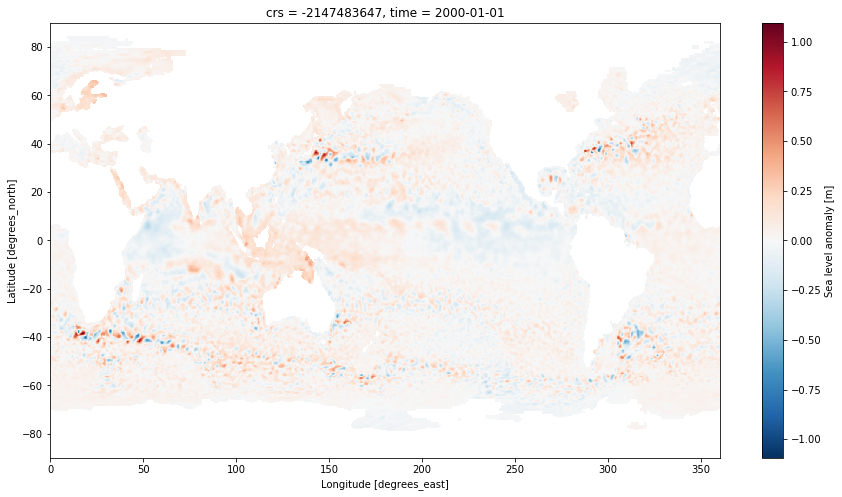

In [4]:
plt.rcParams['figure.figsize'] = (15, 8)
ds.sla.sel(time='2000-01-01', method='nearest').plot()

### Same thing using interactive graphics

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
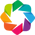

In [5]:
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')

In [6]:
dataset = hv.Dataset(ds.sla)
hv_im = (dataset.to(hv.Image, ['longitude', 'latitude'], dynamic=True)
                .redim.range(sla=(-0.5, 0.5))
                .options(cmap='RdBu_r', width=800, height=450, colorbar=True))

%output holomap='scrubber' fps=2
regrid(hv_im, precompute=True)

:DynamicMap   [time]
   :Image   [longitude,latitude]   (sla)

### Create and Connect to Dask Distributed Cluster

In [7]:
from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster()
cluster.adapt(minimum=4, maximum=40)
cluster

** ☝️ Don't forget to click the link above to view the scheduler dashboard! **

In [8]:
client = Client(cluster)
client

<Client: scheduler='tcp://10.48.72.19:42291' processes=0 cores=0>

## Timeseries of Global Mean Sea Level

Here we make a simple yet fundamental calculation: the rate of increase of global mean sea level over the observational period.

In [9]:
# the number of GB involved in the reduction
ds.sla.nbytes/1e9

73.8284544

In [10]:
# the computationally intensive step
sla_timeseries = ds.sla.mean(dim=('latitude', 'longitude')).load()

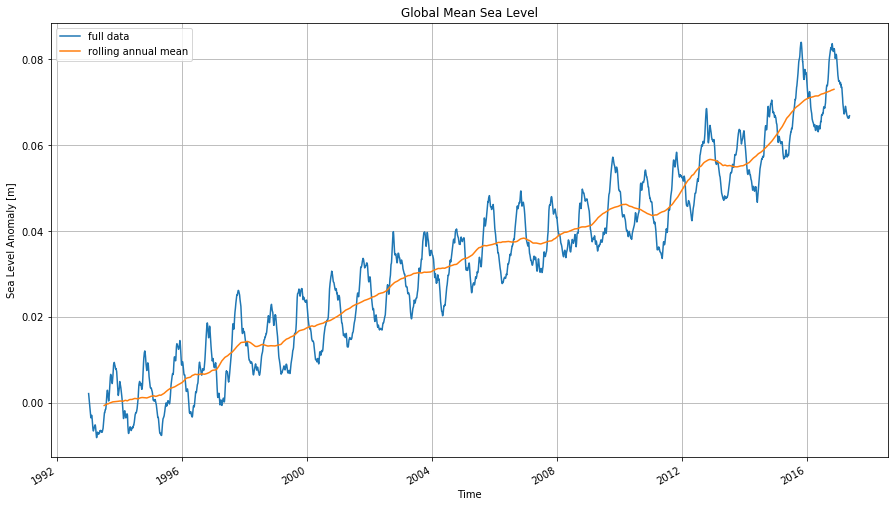

In [11]:
sla_timeseries.plot(label='full data')
sla_timeseries.rolling(time=365, center=True).mean().plot(label='rolling annual mean')
plt.ylabel('Sea Level Anomaly [m]')
plt.title('Global Mean Sea Level')
plt.legend()
plt.grid()

In order to understand how the sea level rise is distributed in latitude, we can make a sort of [Hovmöller diagram](https://en.wikipedia.org/wiki/Hovm%C3%B6ller_diagram).

In [12]:
sla_hov = ds.sla.mean(dim='longitude').load()

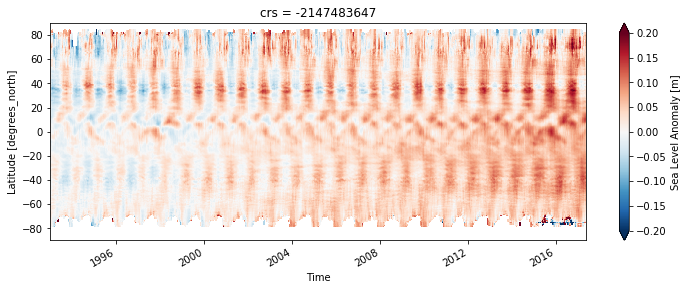

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
sla_hov.name = 'Sea Level Anomaly [m]'
sla_hov.transpose().plot(vmax=0.2, ax=ax)

We can see that most sea level rise is actually in the Southern Hemisphere.

## Sea Level Variability

We can examine the natural variability in sea level by looking at its standard deviation in time.

In [14]:
sla_std = ds.sla.std(dim='time').load()
sla_std.name = 'Sea Level Variability [m]'

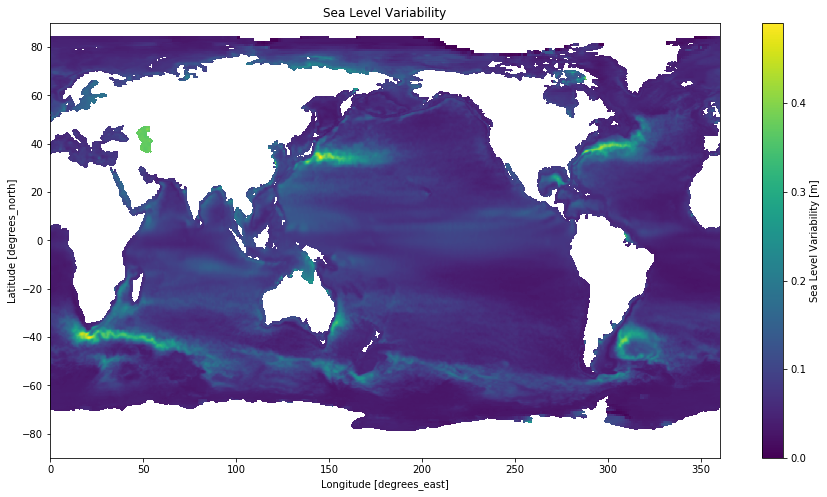

In [15]:
ax = sla_std.plot()
_ = plt.title('Sea Level Variability')

## Spectral Analysis

This is an advanced, research-grade example. Here we perform wavenumber-frequency spectral analysis of the SSH signal using methods similar to those described in [Abernathey & Wortham (2015)](https://journals.ametsoc.org/doi/10.1175/JPO-D-14-0160.1).

#### Step 1: Extract a sector in the Eastern Pacific

This sector is chosen because it has very little land.

In [16]:
sector = ds.sla.sel(longitude=slice(180, 230), latitude=slice(-70, 55, 4))
sector_anom = (sector - sector.mean(dim='longitude'))
sector_anom

<xarray.DataArray 'sla' (time: 8901, latitude: 125, longitude: 200)>
dask.array<shape=(8901, 125, 200), dtype=float64, chunksize=(5, 125, 200)>
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -69.875 -68.875 -67.875 ... 53.125 54.125
  * longitude  (longitude) float32 180.125 180.375 180.625 ... 229.625 229.875
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15

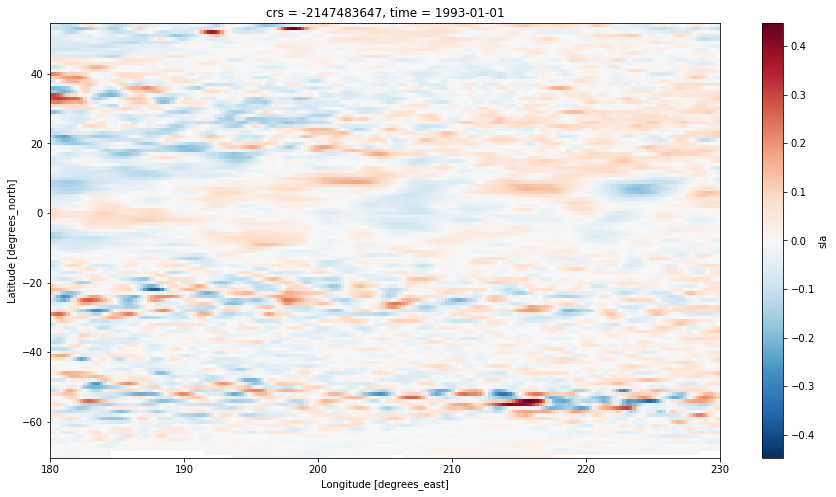

In [17]:
sector_anom[0].plot()

#### Step 2: Rechunk, reshape, and window the data for efficient to prepare for FFT calculation

In [18]:
# reshape data into arrays 365 days long and rechunk
nsegments = 24
segment_len = 365
sector_reshape = (sector_anom.isel(time=slice(0, nsegments*segment_len))
                             .transpose('latitude', 'time', 'longitude')
                             .chunk({'time': segment_len}))
sector_reshape

<xarray.DataArray 'sla' (latitude: 125, time: 8760, longitude: 200)>
dask.array<shape=(125, 8760, 200), dtype=float64, chunksize=(125, 365, 200)>
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -69.875 -68.875 -67.875 ... 53.125 54.125
  * longitude  (longitude) float32 180.125 180.375 180.625 ... 229.625 229.875
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2016-12-25

In [19]:
# now get the raw dask array
data = sector_reshape.data

arrays = [data[:, n*segment_len:(n + 1)*segment_len][np.newaxis]
          for n in range(nsegments)]
stacked = dsa.concatenate(arrays)
stacked

dask.array<concatenate, shape=(24, 125, 365, 200), dtype=float64, chunksize=(1, 125, 365, 200)>

In [20]:
# apply windows
data_windowed = (stacked
                 * np.hanning(stacked.shape[-1])[None, None, None, :]
                 * np.hanning(stacked.shape[-2])[None, None, :, None])

#### Step 3: Actually calculate the Fourier transform and power spectral density

In [21]:
# take FFT
data_fft = dsa.fft.fftn(data_windowed, axes=(-2, -1))

# take power spec and average over segments
power_spec = np.real(data_fft * np.conj(data_fft)).mean(axis=0)
power_spec

dask.array<mean_agg-aggregate, shape=(125, 365, 200), dtype=float64, chunksize=(125, 365, 200)>

In [22]:
# do the computation and load results into memory
power_spec_shift = np.fft.fftshift(power_spec.compute(), axes=(-2, -1))

#### Step 4: Define spectral coordinates and put everything back together in an DataArray

In [23]:
freq = np.fft.fftshift(np.fft.fftfreq(segment_len))

# wavelength is a bit trickier because it depends on latitude
R = 6.37e6
# in km
dx = np.deg2rad(0.25) * R * np.cos(np.deg2rad(sector.latitude)) / 1000
inv_wavelength = np.vstack([np.fft.fftshift(np.fft.fftfreq(len(sector.longitude), d))
                            for d in dx.values])

ps_da = xr.DataArray(power_spec_shift, dims=('latitude', 'freq', 'wavenumber'),
                     coords={'latitude': sector.latitude,
                             'freq': ('freq', -freq, {'units': r'days$^{-1}$'}),
                              'inverse_wavelength': (('latitude', 'wavenumber'),
                                                     inv_wavelength, {'units': r'km$^{-1}$'})},
                     name='SSH_power_spectral_density')
ps_da

<xarray.DataArray 'SSH_power_spectral_density' (latitude: 125, freq: 365, wavenumber: 200)>
array([[[         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[1.012112e-05, 9.904685e-06, ..., 1.203712e-05, 8.895223e-06],
        [7.654620e-06, 8.983046e-06, ..., 8.777957e-06, 9.558201e-06],
        ...,
        [7.654620e-06, 9.558201e-06, ..., 9.918320e-06, 8.983046e-06],
        [1.012112e-05, 8.895223e-06, ..., 1.257218e-05, 9.904685e-06]],

#### Step 5: Plot wavenumber-frequency power spectra at different latitudes

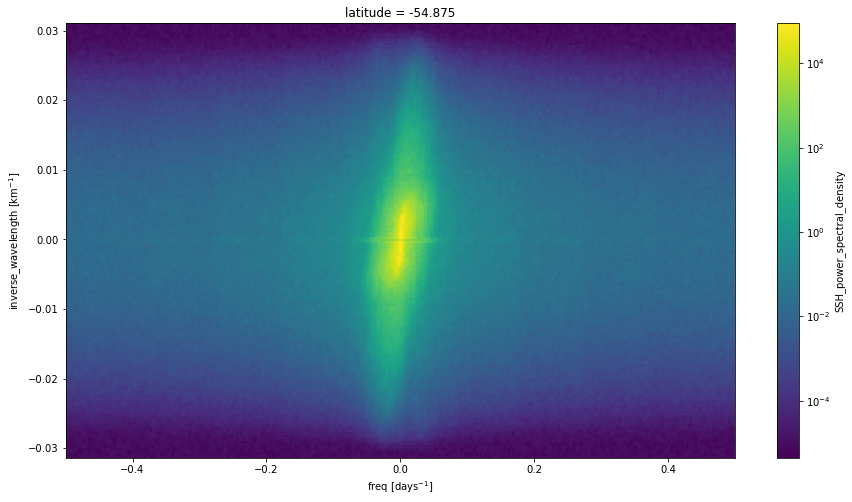

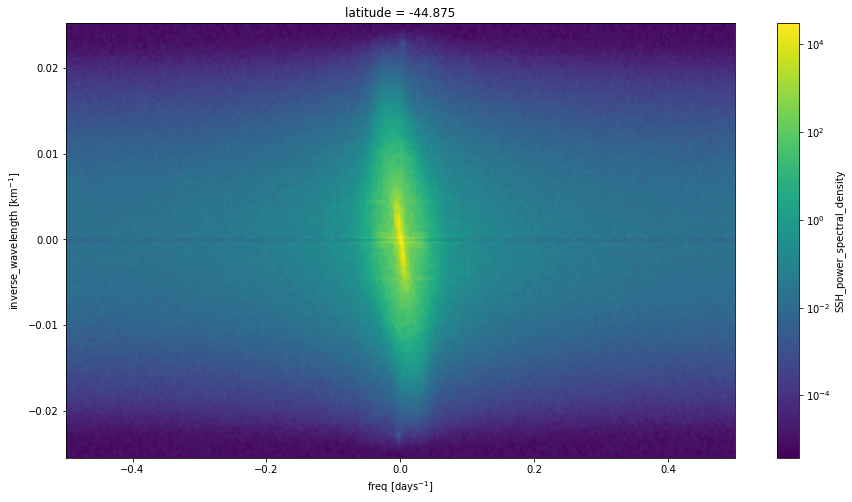

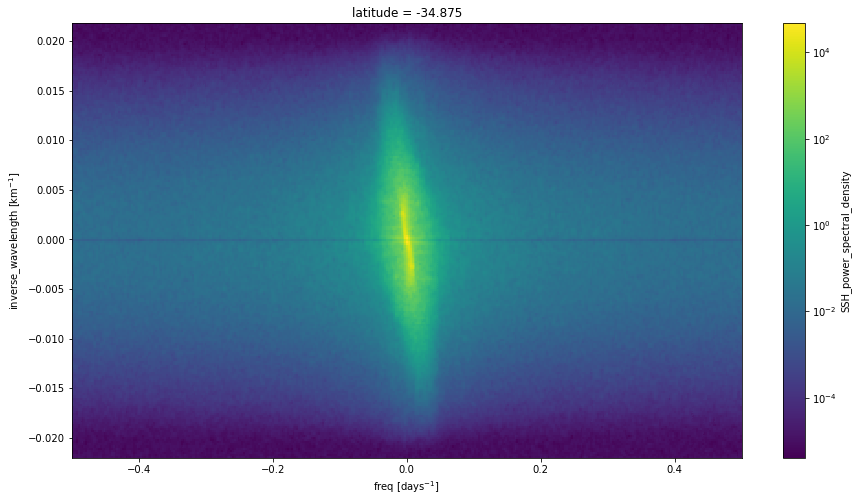

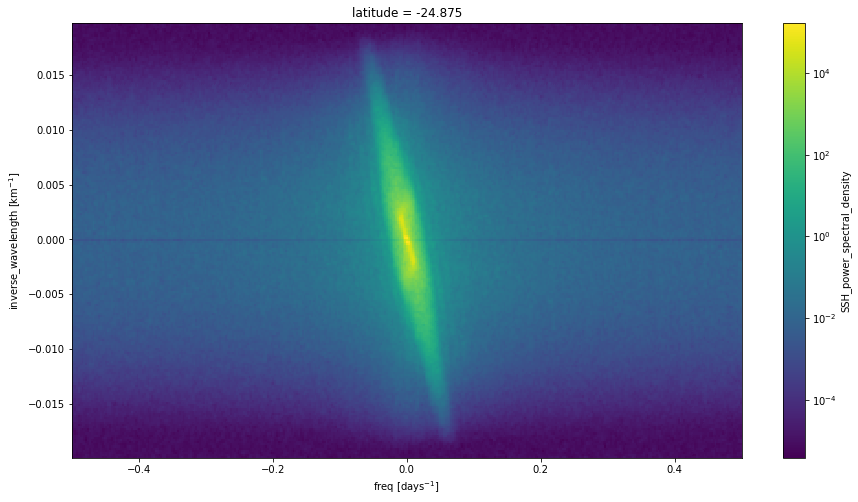

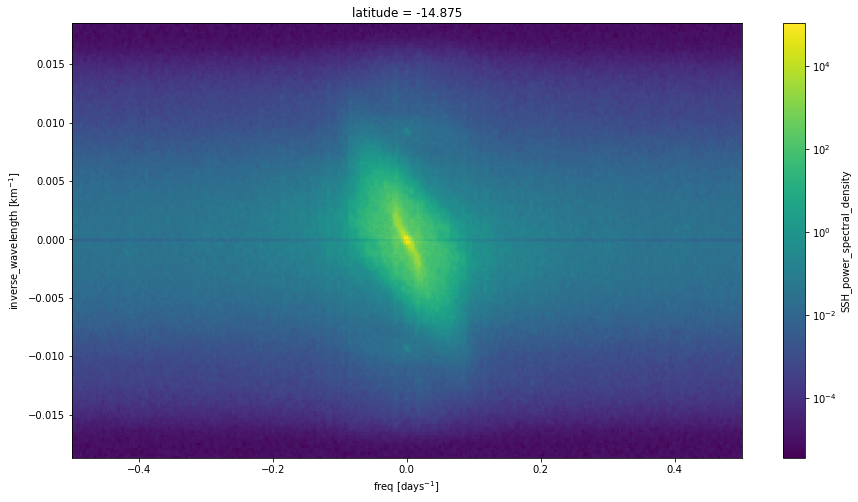

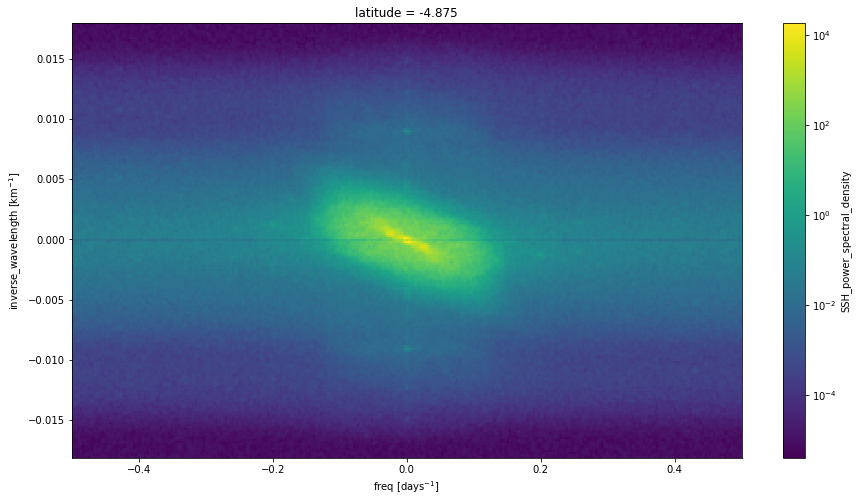

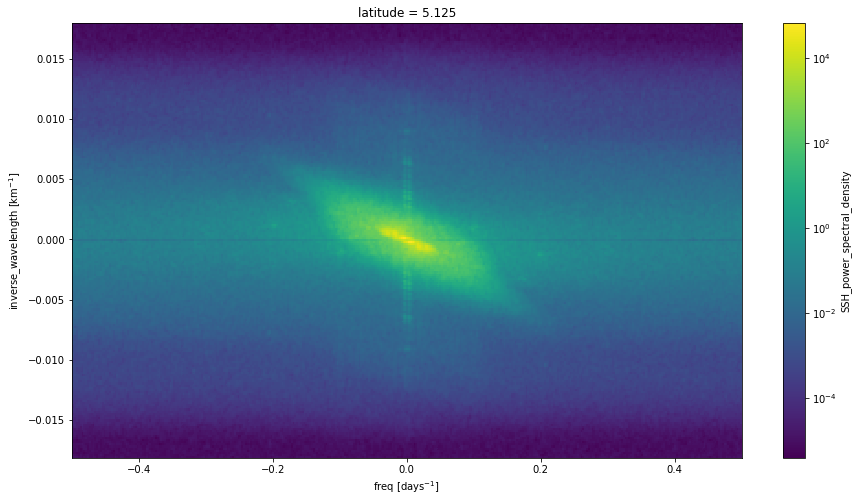

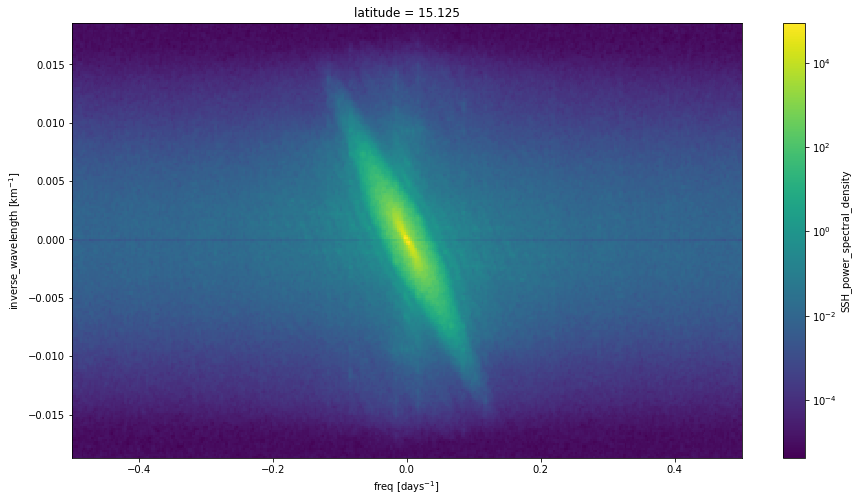

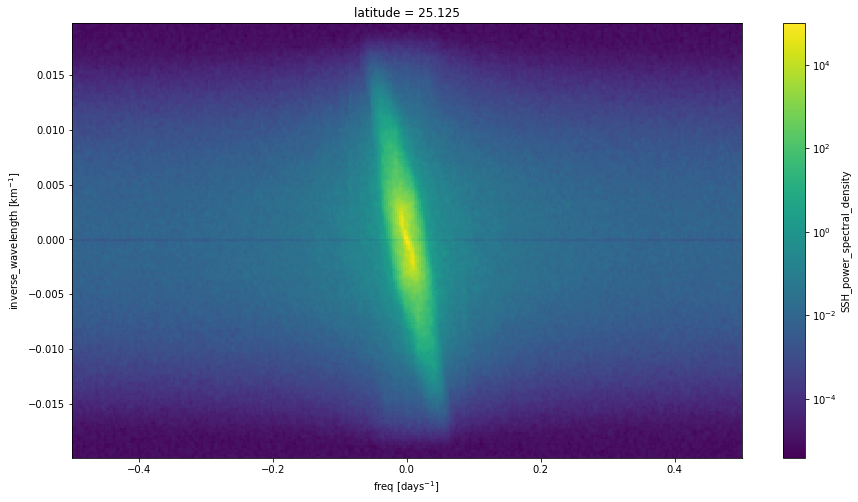

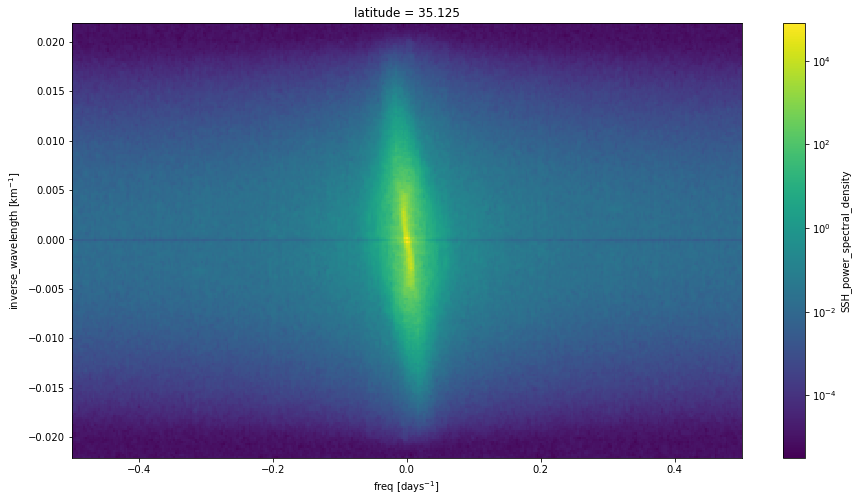

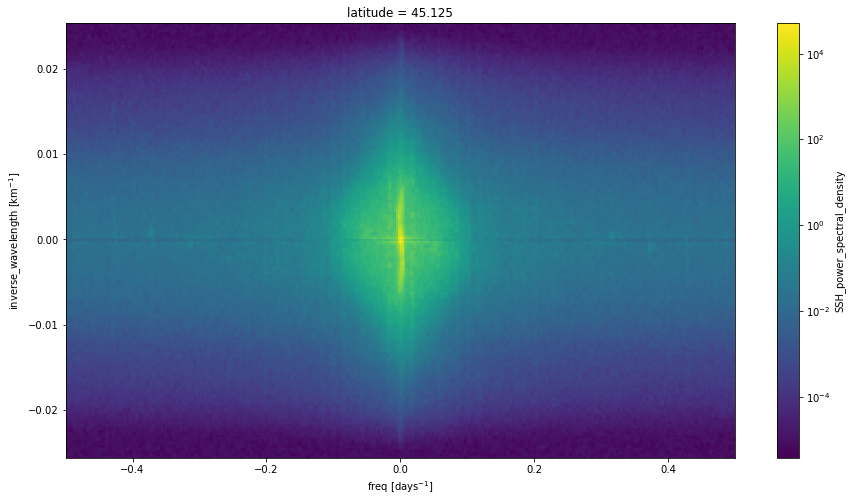

In [24]:
from matplotlib.colors import LogNorm

for lat in range(-55, 55, 10):
    plt.figure()
    (ps_da.sel(latitude=lat, method='nearest')
          .swap_dims({'wavenumber': 'inverse_wavelength'})
          .transpose().plot(norm=LogNorm()))

After going through all that complexity, you might be interested to know that there is a library which facilitaties spectral analysis of xarray datasets:

- https://xrft.readthedocs.io/en/latest/

With xrft, we could have reduced all the steps above to a few lines of code. But we would not have learned as much! 😜